In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import cv2
import numpy as np
import random


In [14]:

# === PATHS TO SET ===
train_label_dir = "../traffic_data/train/labels"
val_label_dir = "../traffic_data/valid/labels"
train_image_dir = "../traffic_data/train/images"
output_dir = "./output_plots"  # Make sure this exists or create with os.makedirs

# === COLOR PALETTE ===
custom_palette = [
    "#032a4d", "#00457a", "#0458a5", "#0476df", "#50b1ff", "#88cbff", "#9e9e9e"
]

# === CLASS NAMES ===
class_names = [
'ambulance', 'army vehicle', 'auto rickshaw', 'bicycle', 'bus', 'car', 'garbagevan', 'human hauler', 'minibus', 'minivan', 'motorbike', 'pickup', 'policecar', 'rickshaw', 'scooter', 'suv', 'taxi', 'three wheelers -CNG-', 'truck', 'van', 'wheelbarrow'
]



In [15]:

# === FUNCTION TO PROCESS LABEL FILES ===
def process_labels(label_dir):
    class_counts = defaultdict(int)
    objects_per_image = []
    bbox_sizes = []

    for file in os.listdir(label_dir):
        if file.endswith(".txt"):
            with open(os.path.join(label_dir, file), "r") as f:
                lines = f.readlines()
                objects_per_image.append(len(lines))
                for line in lines:
                    parts = line.strip().split()
                    if len(parts) == 5:
                        class_id = int(parts[0])
                        width = float(parts[3])
                        height = float(parts[4])
                        class_counts[class_names[class_id]] += 1
                        bbox_sizes.append(width * height)
    return class_counts, objects_per_image, bbox_sizes

# Draw Bounding Boxes on Sample Images
def draw_bboxes(image_path, label_path, output_path):
    image = cv2.imread(image_path)
    h, w = image.shape[:2]
    with open(label_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            class_id, xc, yc, bw, bh = map(float, parts)
            xmin = int((xc - bw / 2) * w)
            xmax = int((xc + bw / 2) * w)
            ymin = int((yc - bh / 2) * h)
            ymax = int((yc + bh / 2) * h)
            color = tuple(int(custom_palette[int(class_id) % len(custom_palette)].lstrip('#')[i:i+2], 16) for i in (0, 2 ,4))
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color, 2)
            cv2.putText(image, class_names[int(class_id)], (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    cv2.imwrite(output_path, image)

In [16]:
# === PROCESS TRAIN AND VAL LABELS ===
train_counts, train_objs, train_bbox = process_labels(train_label_dir)
val_counts, val_objs, val_bbox = process_labels(val_label_dir)

# === COMBINE ===
total_counts = train_counts.copy()
for k, v in val_counts.items():
    total_counts[k] += v
all_objects = train_objs + val_objs
all_bboxes = train_bbox + val_bbox

C:\Users\furka\AppData\Local\Temp\ipykernel_3948\583426721.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts, x="Class", y="Count", palette=custom_palette * (len(df_counts) // len(custom_palette) + 1))
C:\Users\furka\AppData\Local\Temp\ipykernel_3948\583426721.py:19: UserWarning: The palette list has more values (28) than needed (21), which may not be intended.
  sns.barplot(data=df_counts, x="Class", y="Count", palette=custom_palette * (len(df_counts) // len(custom_palette) + 1))


In [ ]:
# === PLOTS ===
sns.set_theme(style="whitegrid")
os.makedirs(output_dir, exist_ok=True)

In [22]:

# Bar Plot: Class Frequency
df_counts = pd.DataFrame(total_counts.items(), columns=["Class", "Count"]).sort_values("Count", ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_counts, x="Class", y="Count", palette=custom_palette * (len(df_counts) // len(custom_palette) + 1))
plt.xticks(rotation=45)
#plt.title("Class Distribution (Train + Val)")
plt.tight_layout()

#plt.savefig(os.path.join(output_dir, "SMALL_class_distribution.png"))
#plt.close()

C:\Users\furka\AppData\Local\Temp\ipykernel_3948\3634019947.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts, x="Class", y="Count", palette=custom_palette * (len(df_counts) // len(custom_palette) + 1))
C:\Users\furka\AppData\Local\Temp\ipykernel_3948\3634019947.py:4: UserWarning: The palette list has more values (28) than needed (21), which may not be intended.
  sns.barplot(data=df_counts, x="Class", y="Count", palette=custom_palette * (len(df_counts) // len(custom_palette) + 1))


C:\Users\furka\AppData\Local\Temp\ipykernel_3948\200785123.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts, y="Class", x="Count", palette=custom_palette * (len(df_counts) // len(custom_palette) + 1))
C:\Users\furka\AppData\Local\Temp\ipykernel_3948\200785123.py:3: UserWarning: The palette list has more values (28) than needed (21), which may not be intended.
  sns.barplot(data=df_counts, y="Class", x="Count", palette=custom_palette * (len(df_counts) // len(custom_palette) + 1))


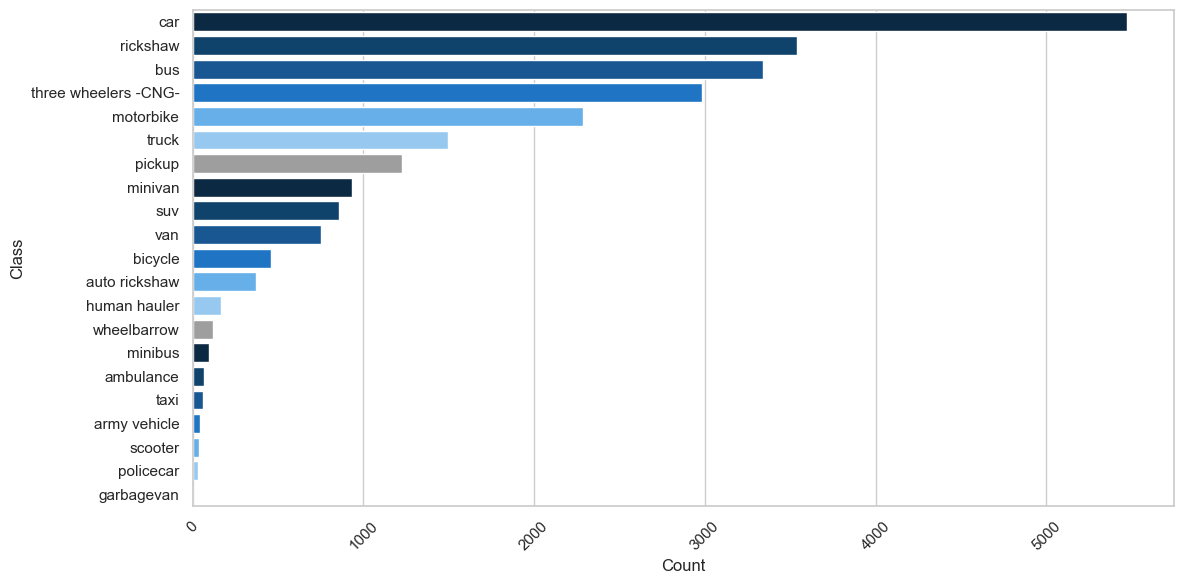

In [24]:

# Horizontal Bar Plot: Class Frequency
plt.figure(figsize=(12, 6))
sns.barplot(data=df_counts, y="Class", x="Count", palette=custom_palette * (len(df_counts) // len(custom_palette) + 1))
plt.xticks(rotation=45)
#plt.title("Class Distribution (Train + Val)")
plt.tight_layout()

plt.savefig(os.path.join(output_dir, "HOR_SMALL_class_distribution.png"))
#plt.close()

In [ ]:

# Pie Chart: Top 5 Classes
top5 = df_counts.head(5)
plt.figure(figsize=(6, 6))
plt.pie(top5["Count"], labels=top5["Class"], colors=custom_palette[:5], autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Most Frequent Classes")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "top5_class_pie.png"))
plt.close()


In [ ]:

# Histogram: Objects per Image
plt.figure(figsize=(8, 5))
sns.histplot(all_objects, bins=15, kde=True, color=custom_palette[3])
plt.title("Objects per Image")
plt.xlabel("Number of Objects")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "objects_per_image.png"))
plt.close()


In [ ]:

# Histogram: Bounding Box Size
plt.figure(figsize=(8, 5))
sns.histplot(all_bboxes, bins=20, color=custom_palette[4], kde=True)
plt.title("Bounding Box Size Distribution (Relative Area)")
plt.xlabel("Normalized Area (width × height)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "bbox_size_distribution.png"))
plt.close()


In [ ]:
# Pick and annotate 2 random training images
label_files = [f for f in os.listdir(train_label_dir) if f.endswith(".txt")]
sample_files = random.sample(label_files, 2)

for i, fname in enumerate(sample_files):
    label_path = os.path.join(train_label_dir, fname)
    image_path = os.path.join(train_image_dir, fname.replace(".txt", ".jpg"))
    output_path = os.path.join(output_dir, f"bbox_example_{i+1}.jpg")
    draw_bboxes(image_path, label_path, output_path)